In [1]:
import pandas as pd
from pandas import read_csv as read
from sklearn.preprocessing import OneHotEncoder
import copy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
class Solver:
    def __init__(self,data):
        self.data=data
        self.corr_matrix = self.data.corr() 
        self.X = pd.DataFrame()
        self.X_test = pd.DataFrame()
        self.X_train = pd.DataFrame()
        self.y = pd.DataFrame()
        self.y_test = pd.DataFrame()
        self.y_train = pd.DataFrame()
    def Task_1(self):
        data_grp=data.groupby("state").sum()
        print('Макс. количество минут в день (штат, число минут):')
        print(data_grp[data_grp['total day minutes']==data_grp['total day minutes'].max()]['total day minutes'].to_string(dtype=False)[6:])
        print('Мин. количество минут в день (штат, число минут):')
        print(data_grp[data_grp['total day minutes']==data_grp['total day minutes'].min()]['total day minutes'].to_string(dtype=False)[6:])
    def Task_2(self):
        print('Среднее количество международных звонков в день, сделанное людьми с международным тарифным планом')
        print(round(data[data['international plan']=='yes']['total intl calls'].mean(),3))
        print('Среднее количество международных звонков в день, сделанное людьми без международного тарифного плана')
        print(round(data[data['international plan']=='no']['total intl calls'].mean(),3))
        data_grp=data.groupby("international plan").sum()
        data_grp=data_grp['total intl calls']
        print('Процент международных звонок, сделанных людьми с международным тарифным планом')
        print(data_grp['yes']/(data_grp['yes']+data_grp['no'])*100,'%')
    def Task_3(self):
        print('Корреляция между оттоком и количеством сделанных звонков в службу поддержки клиентов равна')
        print(self.corr_matrix['churn']['customer service calls'])
    def Task_4(self):
        #Занулим диагональные элементы:
        for i in range(len(self.corr_matrix)):
            self.corr_matrix.iloc(0)[i][i]=0
        print("Самая большая по абсолютному значению корреляция для каждого признака(Признак, значение коореляции, с каким признаком она достигается):")
        for i in self.corr_matrix.columns:
            try:
                self.corr_matrix[self.corr_matrix[i]==abs(self.corr_matrix[i]).max()][i][0]
                print(self.corr_matrix[self.corr_matrix[i]==abs(self.corr_matrix[i]).max()][i].to_string(dtype=False), i)
            except:
                print(self.corr_matrix[self.corr_matrix[i]==-abs(self.corr_matrix[i]).max()][i].to_string(dtype=False), i)
    def Task_5(self, max_feat=0, key=False):
        if not key:
            self._data_transformation()
            self._data_prep()
        clf=self._RND_model()
        if key:
            self._featuring_imp(clf, self.X.columns, max_feat)
        else:
            self._SVM_model()
    def Task_6(self, max_feat=20):
        self.Task_5(max_feat, True)
    def _RND_model(self):
        clf1 = RandomForestClassifier(n_estimators=100,  max_features=20)
        clf1.fit(self.X_train, self.y_train)
        y_pred = clf1.predict(self.X_test)
        print("Точность случайного леса:", metrics.accuracy_score(self.y_test, y_pred))
        return clf1
    def _SVM_model(self):
        clf2 = svm.SVC(kernel='linear')
        clf2.fit(self.X_train, self.y_train)
        y_pred = clf2.predict(self.X_test)
        print("Точность метода опорных векторов:", metrics.accuracy_score(self.y_test, y_pred))
    def _data_prep(self):
        self.y = self.data['churn']
        self.X = copy.deepcopy(self.data)
        del self.X['churn']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.4, random_state=85,stratify=self.y)
    def _data_transformation(self):
        self._kategor_transf('state')
        self._normilizing('account length')
        self._kategor_transf('area code')
        del self.data['phone number']
        self._bool_fact('international plan')
        self._bool_fact('voice mail plan')
        self._normilizing('number vmail messages')
        self._normilizing('total day minutes')
        self._normilizing('total day calls')
        self._normilizing('total day charge')
        self._normilizing('total eve minutes')
        self._normilizing('total eve calls')
        self._normilizing('total eve charge')
        self._normilizing('total night minutes')
        self._normilizing('total night calls')
        self._normilizing('total night charge')
        self._normilizing('total intl minutes')
        self._normilizing('total intl calls')
        self._normilizing('total intl charge')
        self._normilizing('customer service calls')
        self._bool_fact('churn')  
    def _featuring_imp(self,clf, feature_names, max_feat):
        feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
        feature_imp
        %matplotlib inline
        sns.barplot(x=feature_imp[:max_feat], y=feature_imp.index[:max_feat])
        plt.xlabel('Важность признаков')
        plt.ylabel('Признаки')
        plt.title('Случайный лес')
        plt.show()
    def _kategor_transf(self, column):
        self.data=self.data.join(pd.get_dummies(self.data[column]))
        del self.data[column]
    def _normilizing(self, column):
        self.data[column]=self.data[column]/self.data[column].max()
    def _bool_fact(self,column):
        self.data[column] = pd.factorize(self.data[column])[0]

In [3]:
path = r"датасет.csv"
data = read(path, delimiter=",")

In [4]:
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
new_solver=Solver(data)

In [7]:
new_solver.Task_1()

Макс. количество минут в день (штат, число минут):
WV    18438.8
Мин. количество минут в день (штат, число минут):
CA    6241.2


In [9]:
new_solver.Task_2()

Среднее количество международных звонков в день, сделанное людьми с международным тарифным планом
4.61
Среднее количество международных звонков в день, сделанное людьми без международного тарифного плана
4.465
Процент международных звонок, сделанных людьми с международным тарифным планом
9.973208305425318 %


In [11]:
new_solver.Task_3()

Корреляция между оттоком и количеством сделанных звонков в службу поддержки клиентов равна
0.2087499987837943


In [13]:
new_solver.Task_4()

Самая большая по абсолютному значению корреляция для каждого признака(Признак, значение коореляции, с каким признаком она достигается):
total day calls    0.03847 account length
customer service calls    0.027572 area code
churn   -0.089728 number vmail messages
total day charge    1.0 total day minutes
account length    0.03847 total day calls
total day minutes    1.0 total day charge
total eve charge    1.0 total eve minutes
account length    0.01926 total eve calls
total eve minutes    1.0 total eve charge
total night charge    0.999999 total night minutes
total day minutes    0.022972 total night calls
total night minutes    0.999999 total night charge
total intl charge    0.999993 total intl minutes
churn   -0.052844 total intl calls
total intl minutes    0.999993 total intl charge
churn    0.20875 customer service calls
customer service calls    0.20875 churn


In [15]:
new_solver.Task_5()

Точность случайного леса: 0.9565217391304348
Точность метода опорных векторов: 0.8553223388305847


Точность случайного леса: 0.9550224887556222


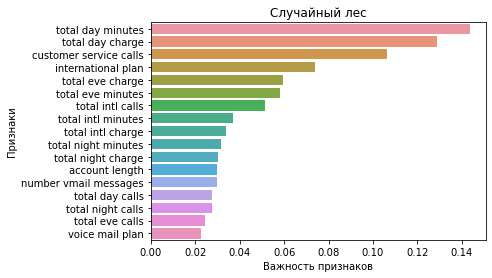

In [17]:

new_solver.Task_6(17)